<a href="https://colab.research.google.com/github/erasafitri/Classification-Customer-s-Traffic-Source/blob/main/Departemen_Sales_Permodelan(Era_Safitri).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BUSINESS UNDERSTANDING


Departemen Sales akan melakukan klasifikasi perilaku konsumen berdasarkan karakteristik yang dimiliki konsumen

5W + 1H
1. Siapa yang berperan membantu departemen penjualan untuk meningkatkan penjualan
2. Apa yang dapat dilakukan agar penjualan dapat meningkat 
3. Mengapa terjadi retur dan cancell
4. Bagaimana cara mengklasifikasikan konsumen

Data yang akan digunakan diantaranya adalah data users dan order items 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-done.csv')

In [ ]:
data.head()

,gender,traffic_source,status
0,F,Search,Shipped
1,F,Email,Cancelled
2,F,Organic,Cancelled
3,M,Search,Shipped
4,M,Search,Shipped


**EXPLORATORY DATA**

In [ ]:
data.describe()

,gender,traffic_source,status
count,180508,180508,180508
unique,2,5,5
top,M,Search,Shipped
freq,90501,126541,54467


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180508 entries, 0 to 180507
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          180508 non-null  object
 1   traffic_source  180508 non-null  object
 2   status          180508 non-null  object
dtypes: object(3)
memory usage: 4.1+ MB


In [ ]:
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])

In [ ]:
label_encoder = LabelEncoder()
data['traffic_source'] = label_encoder.fit_transform(data['traffic_source'])

In [ ]:
label_encoder = LabelEncoder()
data['status'] = label_encoder.fit_transform(data['status'])

In [ ]:
data.head()

,gender,traffic_source,status
0,0,4,4
1,0,1,0
2,0,3,0
3,1,4,4
4,1,4,4


In [ ]:
len(data)

180508

In [ ]:
numerical = data.select_dtypes(include="number").columns.tolist()
print(numerical)

['gender', 'traffic_source', 'status']


In [ ]:
korelasi = data.corr()
korelasi

,gender,traffic_source,status
gender,1.000000,-0.001873,-0.003477
traffic_source,-0.001873,1.000000,-0.003279
status,-0.003477,-0.003279,1.000000


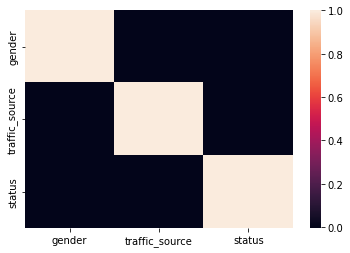

In [ ]:
sns.heatmap(korelasi);
plt.show()

dari dua atribut diatas tidak ada yang korelasinya mendekati satu namun nilai korelasinya sama jadi tetap dapat dipakai sebagai variabel

#DATA UNDERSTANDING

Identifikasi Missing Value

In [ ]:
data.isnull().sum()

gender            0
traffic_source    0
status            0
dtype: int64

tidak ditemukan missing value pada data

Identifikasi Outlier

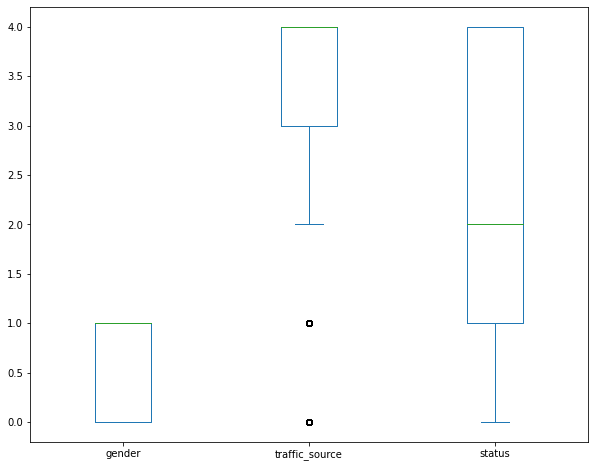

In [ ]:
data[numerical].plot(kind="box", figsize=(10, 8))
plt.grid(False)
plt.show()

Ternyata ditemukan outlier pada atribut "Traffic_Source"

Outlier tidak dihapus karena tidak terlalu mempengaruhi data 

#DATA PREPARATION

menentukan variabel independen dan dependen

In [ ]:
X = data.drop(["status"],axis=1)
print(X)

        gender  traffic_source
0            0               4
1            0               1
2            0               3
3            1               4
4            1               4
...        ...             ...
180503       0               4
180504       0               4
180505       0               4
180506       0               4
180507       0               1

[180508 rows x 2 columns]


In [ ]:
Y = data["status"]
print(Y)

0         4
1         0
2         0
3         4
4         4
         ..
180503    3
180504    0
180505    2
180506    4
180507    1
Name: status, Length: 180508, dtype: int64


visualisasi variabel x

In [ ]:
import plotly.express as px
f = px.bar(data['gender'].value_counts())
f.show()

dari visualisasi diatas proporsi antara pria dan wanita sama besarnya dalam mempengaruhi penjualan

In [ ]:
import plotly.express as px
f = px.bar(data['traffic_source'].value_counts())
f.show()

Dari visualisasi diatas didapatkan insight bahwa kebanyakan konsumen menemukan The Look dengan fitur **search**

#MODELLING

In [ ]:
modelnb = GaussianNB()

In [ ]:
X = data.drop(["status"],axis=1)
print(X)

        gender  traffic_source
0            0               4
1            0               1
2            0               3
3            1               4
4            1               4
...        ...             ...
180503       0               4
180504       0               4
180505       0               4
180506       0               4
180507       0               1

[180508 rows x 2 columns]


In [ ]:
Y = data["status"]
print(Y)

0         4
1         0
2         0
3         4
4         4
         ..
180503    3
180504    0
180505    2
180506    4
180507    1
Name: status, Length: 180508, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
len(X_test)

36102

In [ ]:
X_train.head()

,gender,traffic_source
136683,1,2
16379,0,4
86242,0,3
109545,0,4
82518,1,4


In [ ]:
X_test.head()

,gender,traffic_source
174403,0,2
120400,1,4
150570,1,4
129583,1,1
31687,0,3


In [ ]:
Y_train.head()

136683    1
16379     3
86242     1
109545    2
82518     2
Name: status, dtype: int64

In [ ]:
X_train.shape

(144406, 2)

In [ ]:
X_test.shape

(36102, 2)

In [ ]:
Y_train.shape

(144406,)

In [ ]:
Y_test.shape

(36102,)

Fitting Naive Bayes pada X dan Y train

In [ ]:
nbtrain = modelnb.fit(X_train, Y_train)

Melakukan prediksi variabel pada X

In [ ]:
y_pred = nbtrain.predict(X_test)
y_pred

array([4, 4, 4, ..., 4, 4, 4])

In [ ]:
X_test.head(2)

,gender,traffic_source
174403,0,2
120400,1,4


Dari prediksi yang telah dilakukan diatas dapat diperoleh insight bahwa konsumen **berjenis kelamin** **perempuan (0)** dengan **traffic source Facebook (2)** akan melakukan pembelian lagi 

#EVALUASI

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[    0     0     0     0  5347]
 [    0     0     0     0  9005]
 [    0     0     0     0  7339]
 [    0     0     0     0  3635]
 [    0     0     0     0 10776]]


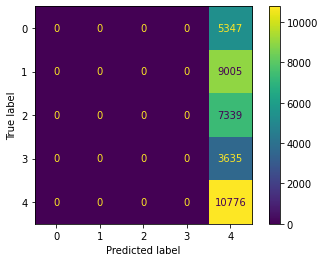

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nbtrain.classes_)

disp.plot()
plt.show()

In [ ]:
36102/(5347+9005+7339+3635+10776)

1.0

Dari hasil **evaluasi** diatas diperoleh bahwa akurasi prediksi 100%

In [ ]:
data

,gender,traffic_source,status
0,0,4,4
1,0,1,0
2,0,3,0
3,1,4,4
4,1,4,4
...,...,...,...
180503,0,4,3
180504,0,4,0
180505,0,4,2
180506,0,4,4


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-done.csv')
df

,gender,traffic_source,status
0,F,Search,Shipped
1,F,Email,Cancelled
2,F,Organic,Cancelled
3,M,Search,Shipped
4,M,Search,Shipped
...,...,...,...
180503,F,Search,Returned
180504,F,Search,Cancelled
180505,F,Search,Processing
180506,F,Search,Shipped


In [ ]:
dtt = pd.concat([df, data], axis=1)
dtt.head(30)

,gender,traffic_source,status,gender,traffic_source,status
0,F,Search,Shipped,0,4,4
1,F,Email,Cancelled,0,1,0
2,F,Organic,Cancelled,0,3,0
3,M,Search,Shipped,1,4,4
4,M,Search,Shipped,1,4,4
5,M,Search,Shipped,1,4,4
6,M,Search,Returned,1,4,3
7,M,Search,Returned,1,4,3
8,M,Organic,Processing,1,3,2
9,M,Search,Processing,1,4,2


In [ ]:
drive.mount('/content/drive', force_remount=True)

path = '/content/drive/MyDrive/Colab Notebooks/'
dtt.to_csv(path+"Sales_Departement_Permodelan.csv", index=None)

Mounted at /content/drive
